# Second Quantization

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [4]:
n = 3 #number of particles
L = 8  #length of system
t = 1  #hopping integral
V = 1  #electron repulsion

## Define Creation Operator and Number Operator

In [5]:
sigma_minus = sp.sparse.csr_matrix([[0,0],
                        [1,0]])
sigma_z = sp.sparse.csr_matrix([[1,0],
                    [0,-1]])
creation_operators = [None] * L
number_operators = [None] * L

In [6]:
def creation_operator(site_index):
    if site_index==0:
        return sp.sparse.kron(sigma_minus,np.eye(2**(L-1)))
    elif site_index == L-1:
        temp = sigma_z
        for i in range(site_index-1):
            temp = sp.sparse.kron(temp,sigma_z)
        return sp.sparse.kron(temp,sigma_minus)
    else:
        temp = sigma_z
        for i in range(site_index-1):
            temp = sp.sparse.kron(temp,sigma_z)
        temp = sp.sparse.kron(temp,sigma_minus)
        return sp.sparse.kron(temp,np.eye(2**(L-site_index-1)))

In [7]:
for site_index in range(L):
    creation_operators[site_index] = creation_operator(site_index)
    number_operators[site_index] = creation_operators[site_index] @ creation_operators[site_index].conj().T

## Define $H$ and $N_{tot}$

In [8]:
H = 0
N_tot = 0
for site_index in range(L):
    H += -t*(creation_operators[site_index] @ creation_operators[(site_index+1)%L].conj().T
             + creation_operators[(site_index+1)%L] @ creation_operators[site_index].conj().T)
    H += V*(number_operators[site_index] @ number_operators[(site_index+1)%L])
    N_tot += number_operators[site_index]

## imposing fermionic statistics

In [9]:
F = np.diag(N_tot.todense()) == n
H_tiled  = H.todense()[F][:,F]

## Diagonalization and Find Ground State

In [10]:
eigenvalues, eigenvectors  = np.linalg.eigh(H_tiled)

In [37]:
ground_state_energy = eigenvalues[0]
ground_state_wave_function = np.array(eigenvectors[:,0].T)[0]
ground_state_wave_function_tiled = np.zeros(2**L)
ground_state_wave_function_tiled[F] = ground_state_wave_function 

In [12]:
ground_state_energy

-4.493959207434934

# Correlation Function

In [54]:
correlations = np.zeros(L)
for site_index in range(L):
    correlations[site_index] = ground_state_wave_function_tiled.conj().T @ number_operators[site_index] @ number_operators[0] @ ground_state_wave_function_tiled

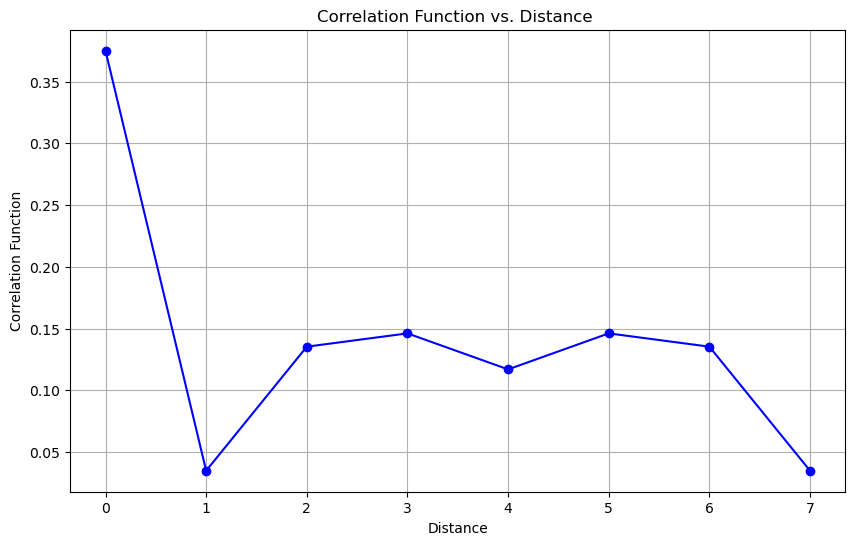

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(0,L,1), correlations, 'bo-')
plt.xlabel('Distance')
plt.ylabel('Correlation Function')
plt.title('Correlation Function vs. Distance ')
plt.grid(True)
plt.show()